In [2]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(cowplot))
suppressMessages(library(colorRamp2))
suppressMessages(library(ComplexHeatmap))

Warning message:
“package ‘Rcpp’ was built under R version 4.4.2”


In [3]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [4]:
proj <- loadArchRProject("./ArchRProject_epithelial", showLogo = FALSE)

Successfully loaded ArchRProject!



In [5]:
cell_annotations <- list(
    "CNV_high" = c("C10", "C11", "C12"),
    "CNV_low" = c(paste0("C", 1:9), paste0("C",13:25))
)

In [6]:
idz <- lapply(cell_annotations, function(x) which(proj$clusters %in% x))
proj$CNV <- rep(NA, nrow(proj@cellColData))
for(i in names(idz)){proj$CNV[idz[[i]]] <- i}

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-240c9f357974c3-Date-2025-03-04_Time-05-28-10.464881.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-240c9f357974c3-Date-2025-03-04_Time-05-28-10.464881.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-240c9f7a32de38-Date-2025-03-04_Time-05-28-15.462968.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-240c9f7a32de38-Date-2025-03-04_Time-05-28-15.462968.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-240c9fa743cc7-Date-2025-03-04_Time-05-28-15.928527.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedd

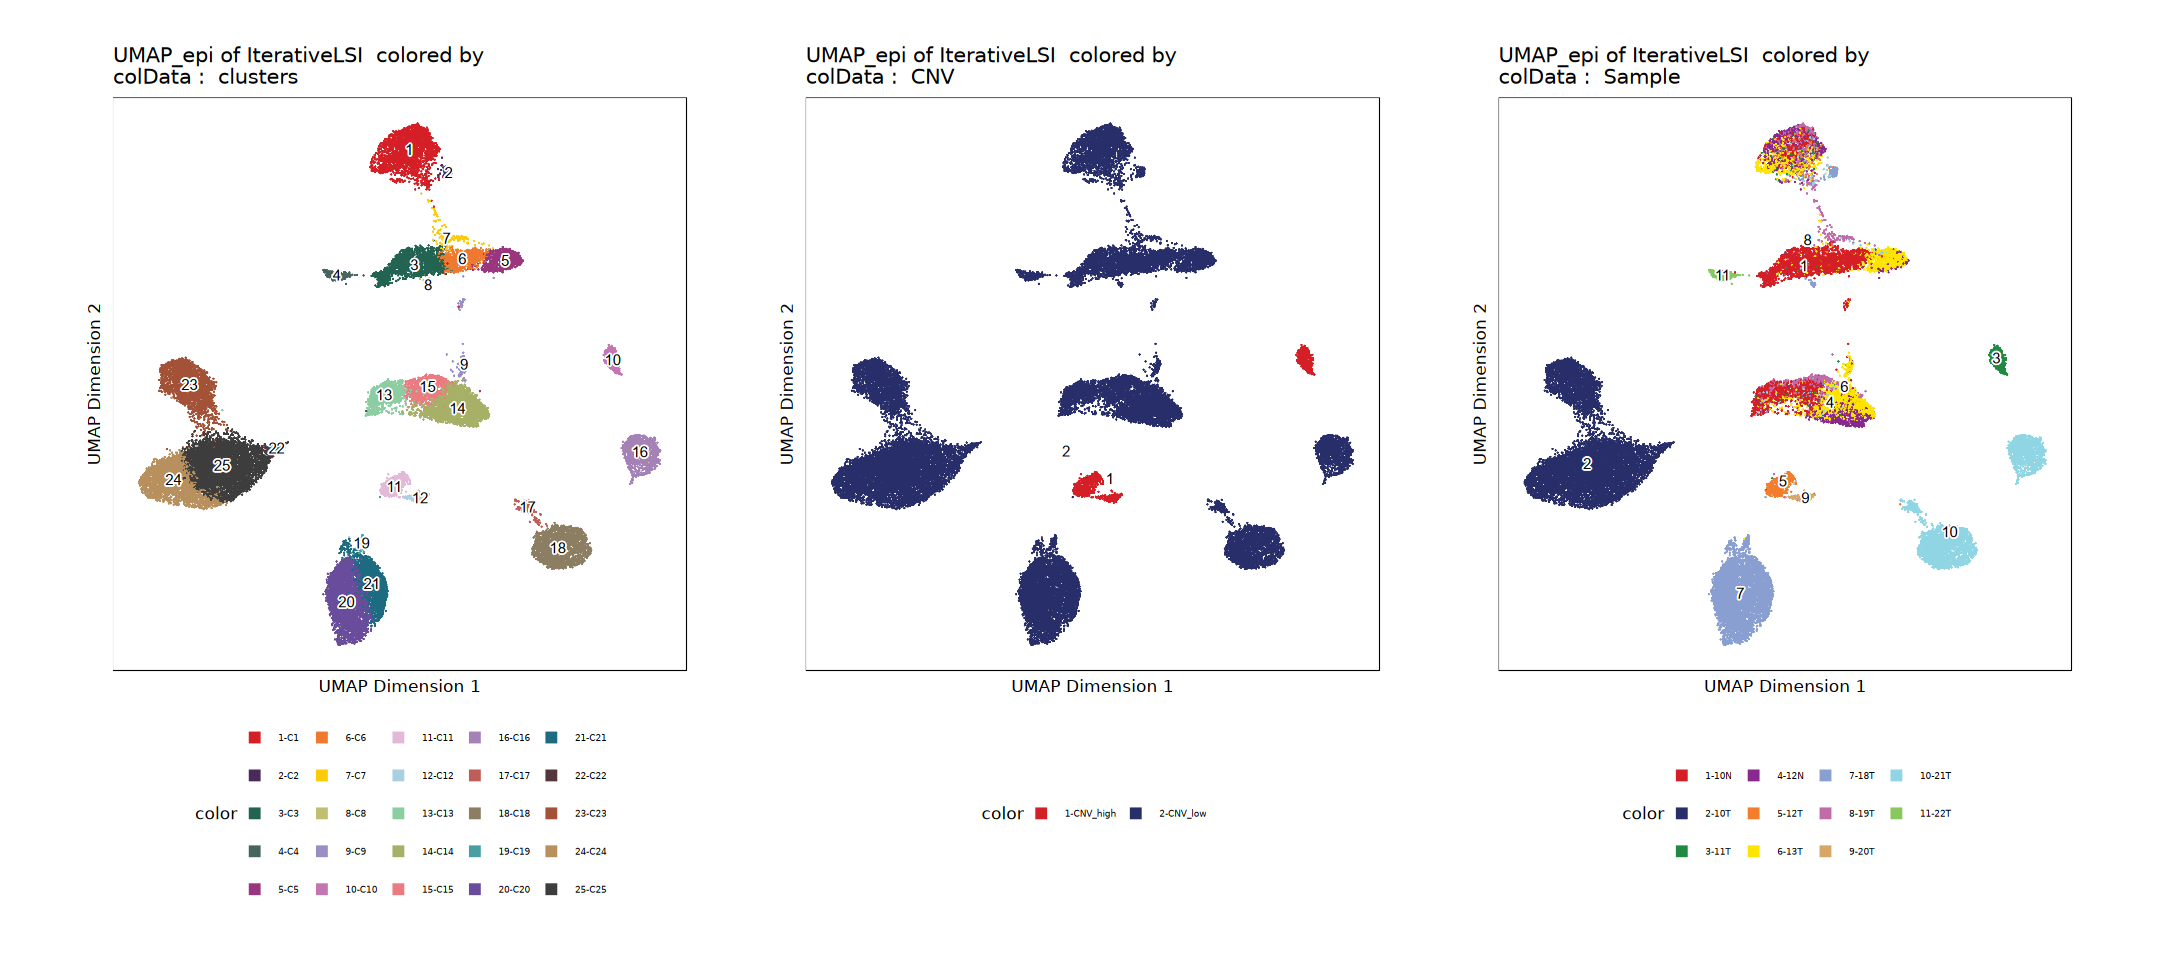

In [6]:
options(repr.plot.height = 8, repr.plot.width = 18)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters", 
    embedding = "UMAP_epi"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "CNV", 
    embedding = "UMAP_epi"
    )
p3 <- plotEmbedding(
    ArchRProj = proj,
    colorBy = "cellColData",
    name = "Sample",
    embedding = "UMAP_epi"
    )
ggAlignPlots(p1, p2, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31c3b61c5c49fd-Date-2025-03-04_Time-06-08-46.032168.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31c3b61c5c49fd-Date-2025-03-04_Time-06-08-46.032168.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-31c3b61341ea7d-Date-2025-03-04_Time-06-08-48.012473.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-31c3b61341ea7d-Date-2025-03-04_Time-06-08-48.012473.log



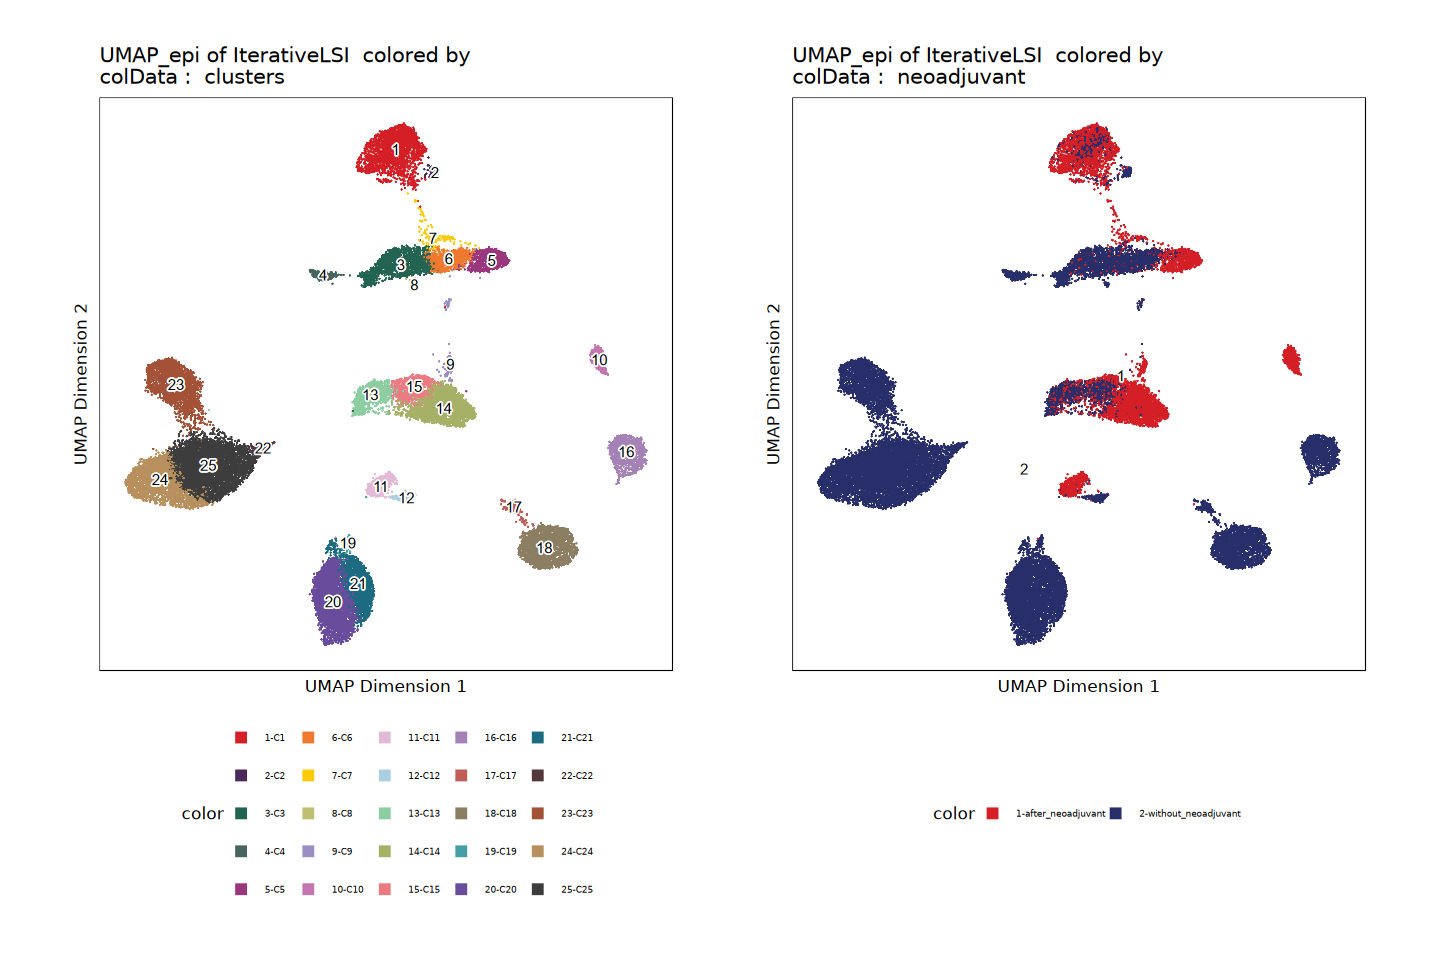

In [7]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters", 
    embedding = "UMAP_epi"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_epi"
    )
ggAlignPlots(p1, p2, type = "h")

In [7]:
new_order <- c(
    "CNV_high", "CNV_low"
)


  CNV_high    CNV_low 
0.04192604 0.95807396 

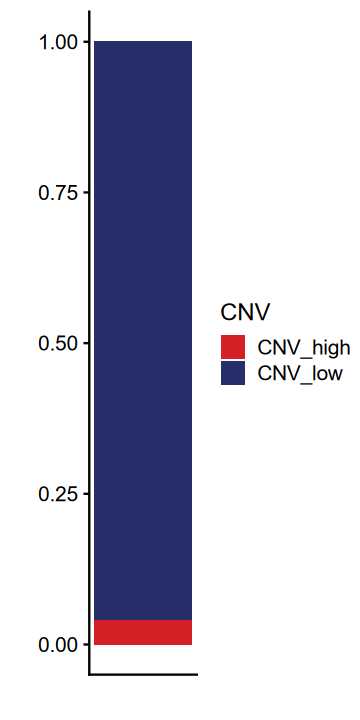

In [ ]:
# 计算总体细胞类型比例output.png
total_cell_type_distribution <- table(proj$CNV)
total_cell_type_distribution <- total_cell_type_distribution / sum(total_cell_type_distribution)
total_cell_type_distribution
# 转换为数据框
df_total <- as.data.frame(total_cell_type_distribution)
df_total$Var1 <- factor(df_total$Var1, levels = new_order)
cols <- ArchR::paletteDiscrete(df_total$Var1)
# 创建堆叠图
p <- ggplot(df_total, aes(x = 1, y = Freq, fill = Var1)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +
  xlab("") +
  ylab("") +
  theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())+
  labs(fill = "CNV")
options(repr.plot.width = 3, repr.plot.height = 6)

p

     
      CNV_high CNV_low
  10N        0    3936
  10T        2    9768
  11T      502     161
  12N        0    1345
  12T      544     182
  13T        1    3018
  18T        2    4904
  19T        6    1160
  20T      184       0
  21T        5    3721
  22T        0     278

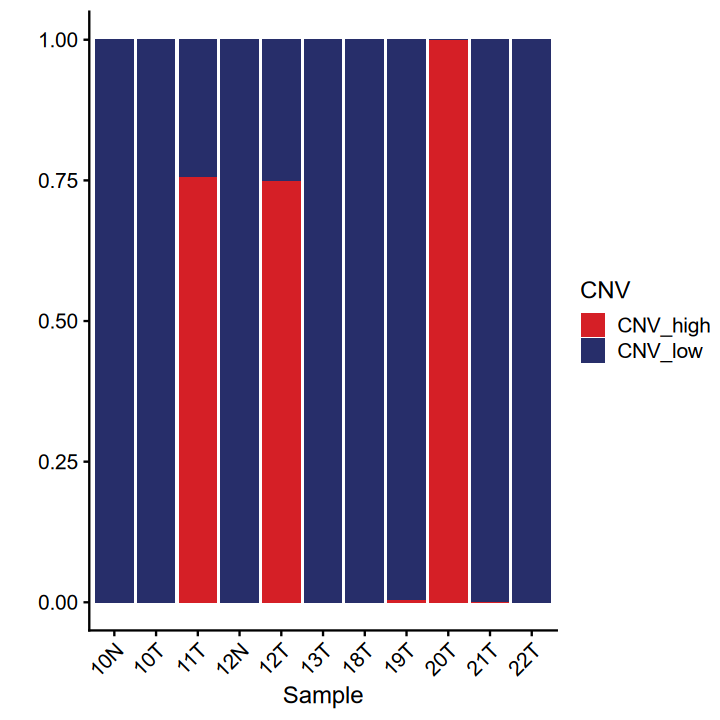

In [ ]:
# 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj$Sample, proj$CNV)
sample_cell_type_distribution
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
df_sample$Var2 <- factor(df_sample$Var2, levels = new_order)
cols <- ArchR::paletteDiscrete(df_sample$Var2)

# 创建堆叠图
p <- ggplot(df_sample, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +output.png
  xlab("Sample") +
  ylab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "CNV")

options(repr.plot.width = 6, repr.plot.height = 6)

p

In [10]:
markersGS <- readRDS(file = "./ArchRProject_epithelial/markersGS.rds")

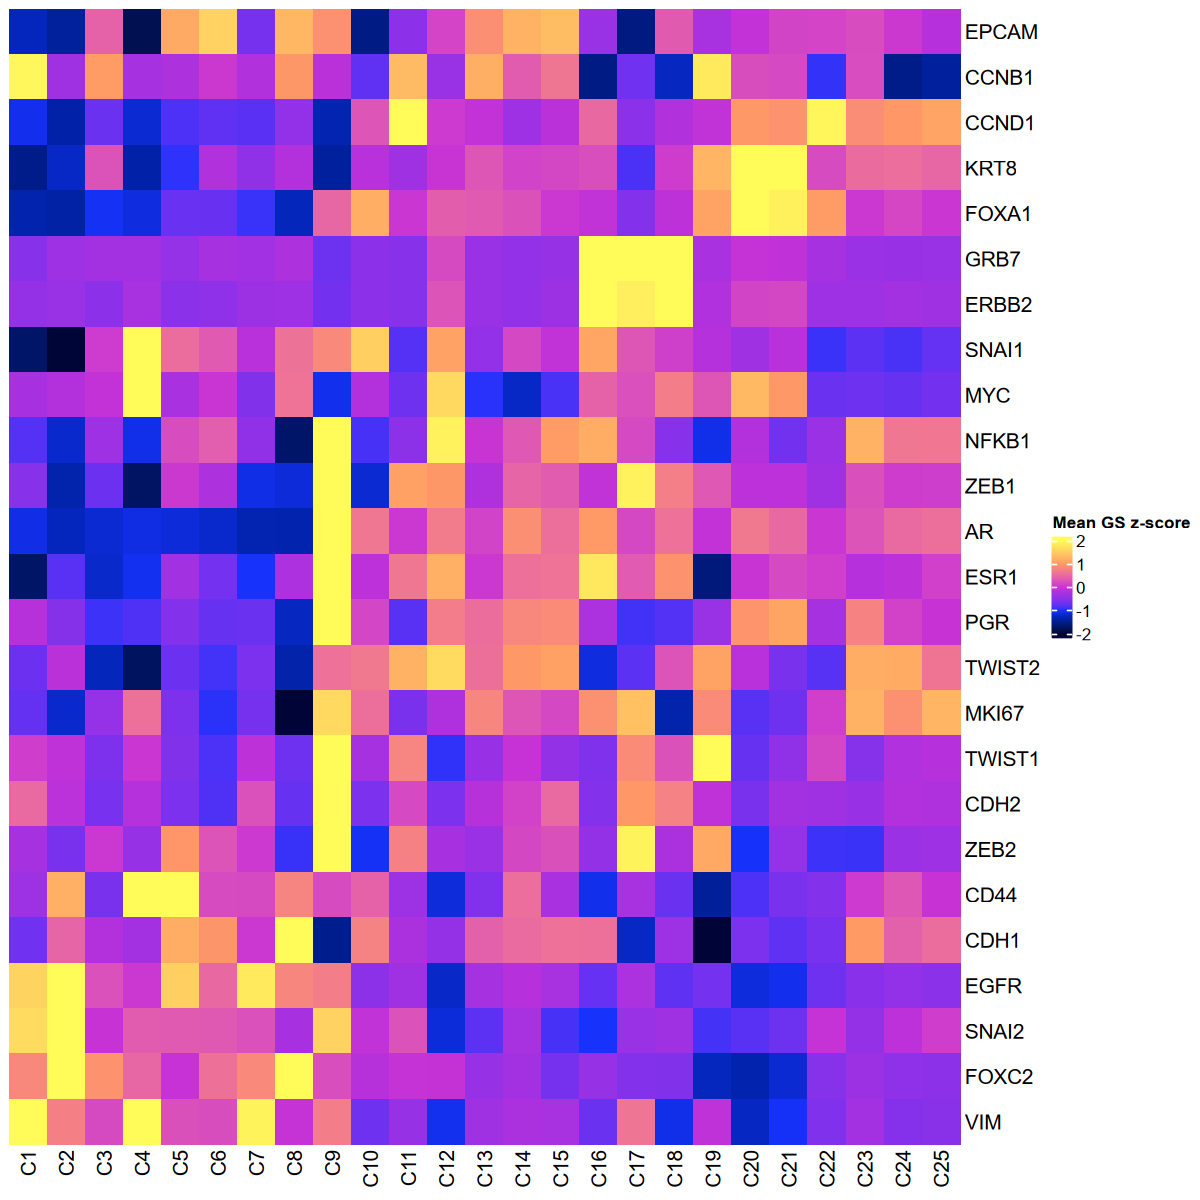

In [11]:
## 后续图 - 基于clusters
### marker gene基因活性
# Heatmap
## marker genes, 根据05_01_annotation中的显著表达来确定绘图的marker genes
markerGenes <- c(
    "MYC", "ERBB2", "GRB7", "TWIST2", "CDH1",
    "CCND1", "TWIST1", "FOXA1", "KRT8", "AR",
    "MKI67", "CCNB1", "CD44", "PGR", "ESR1",
    "CDH2", "ZEB2", "EGFR", "FOXC2", "ZEB1",
    "VIM", "SNAI2", "SNAI1", "NFKB1", "EPCAM"
)

## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [12]:
### marker gene signal tracks
p4 <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "clusters", 
    geneSymbol = c(
        "EPCAM","VIM","EGFR", "KRT5", "KRT17",
        "KRT18","KRT8", "ERBB2", "GRB7", "MYC",
        "CDH2", "ZEB1", "ZEB2", "SNAI1", "SNAI2",
        "FOXC2"), 
    upstream = 10000, # 10kb
    downstream = 10000, # 10kb
    plotSummary = c("bulkTrack","geneTrack")
)
plotPDF(
    p4,
    name = "epi_Plot-Tracks-Marker-Genes_02.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, 
    width = 7, 
    height = 10
    )

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-240c9f8a40bc-Date-2025-03-04_Time-05-28-32.71594.log
If there is an issue, please report to github with logFile!

2025-03-04 05:28:32.810235 : Validating Region, 0.002 mins elapsed.



GRanges object with 16 ranges and 2 metadata columns:
       seqnames              ranges strand |     gene_id      symbol
          <Rle>           <IRanges>  <Rle> | <character> <character>
   [1]     chr2   47345158-47387601      + |        4072       EPCAM
   [2]    chr10   17228259-17237593      + |        7431         VIM
   [3]     chr7   55019021-55256620      + |        1956        EGFR
   [4]    chr12   52514575-52520687      - |        3852        KRT5
   [5]    chr17   41619437-41624842      - |        3872       KRT17
   ...      ...                 ...    ... .         ...         ...
  [12]    chr10   31318495-31529814      + |        6935        ZEB1
  [13]     chr2 144384081-144524583      - |        9839        ZEB2
  [14]    chr20   49982999-49988886      + |        6615       SNAI1
  [15]     chr8   48917690-48921740      - |        6591       SNAI2
  [16]    chr16   86567251-86569728      + |        2303       FOXC2
  -------
  seqinfo: 24 sequences from hg38 genom

2025-03-04 05:28:32.935361 : Adding Bulk Tracks (1 of 16), 0.004 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-04 05:28:51.067621 : Adding Gene Tracks (1 of 16), 0.306 mins elapsed.

2025-03-04 05:28:51.532767 : Plotting, 0.314 mins elapsed.

2025-03-04 05:28:53.232836 : Adding Bulk Tracks (2 of 16), 0.342 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-04 05:28:57.822439 : Adding Gene Tracks (2 of 16), 0.418 mins elapsed.

2025-03-04 05:28:58.129721 : Plotting, 0.424 mins elapsed.

2025-03-04 05:28:59.651004 : Adding Bulk Tracks (3 of 16), 0.449 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-04 05:29:05.305476 : Adding Gene Tracks (3 of 16), 0.543 mins elapsed.

2025-03-04 05:29:05.609475 : Plotting, 0.548 mins elapsed.

2025-03-04 05:29:07.098704 : Adding Bulk Tracks (4 of 16), 0.573 mins elapsed.

Length of unique values greater than palette, interpolating..

2025-03-

NULL
_msg_send errno: 4 strerror: Interrupted system call


Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!

Plotting Gtable!



L


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


In [13]:
getAvailableMatrices(proj)

[1] "ATACMatrix"       "EncodeTFBSMatrix" "GeneScoreMatrix"  "MotifMatrix"     
[5] "PeakMatrix"       "TileMatrix"       "homerMatrix"

DataFrame with 6 rows and 6 columns
    seqnames       idx              name combinedVars combinedMeans      rank
       <Rle> <integer>       <character>    <numeric>     <numeric> <integer>
f87        z        87 FOXA1.Forkhead_87      68.3331   -0.65523535         1
f86        z        86     Fosl2.bZIP_86      64.1998    0.00507140         2
f1         z         1       AP.1.bZIP_1      63.3041    0.02254696         3
f99        z        99      Fra2.bZIP_99      62.8903    0.00733377         4
f94        z        94 FOXM1.Forkhead_94      62.5174   -0.64134957         5
f88        z        88 FOXA1.Forkhead_88      61.6128   -0.63294138         6


Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


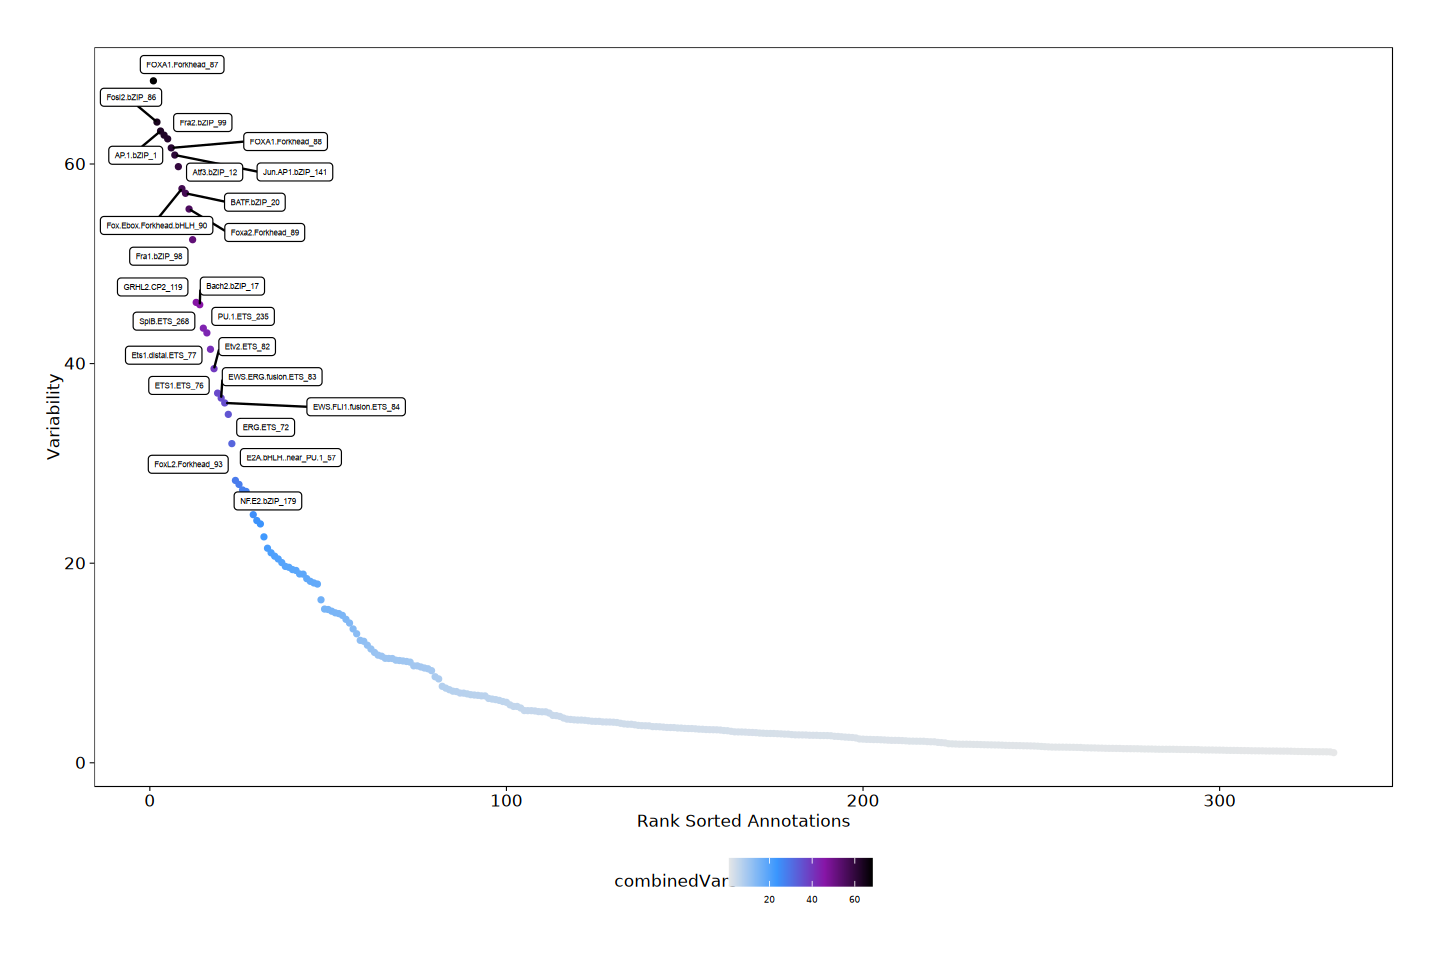

In [9]:
VarMotifs <- getVarDeviations(proj, name = "homerMatrix", plot = TRUE)
VarMotifs

DataFrame with 6 rows and 6 columns
    seqnames       idx              name combinedVars combinedMeans      rank
       <Rle> <integer>       <character>    <numeric>     <numeric> <integer>
f87        z        87 FOXA1.Forkhead_87      68.3331   -0.65523535         1
f86        z        86     Fosl2.bZIP_86      64.1998    0.00507140         2
f1         z         1       AP.1.bZIP_1      63.3041    0.02254696         3
f99        z        99      Fra2.bZIP_99      62.8903    0.00733377         4
f94        z        94 FOXM1.Forkhead_94      62.5174   -0.64134957         5
f88        z        88 FOXA1.Forkhead_88      61.6128   -0.63294138         6


ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-240c9f78993879-Date-2025-03-04_Time-05-30-37.585123.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Assays.Matrix

2025-03-04 05:30:37.754298 : Matching Known Biases, 0.002 mins elapsed.

###########
2025-03-04 05:30:49.731869 : Completed Pairwise Tests, 0.201 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-240c9f78993879-Date-2025-03-04_Time-05-30-37.585123.log

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


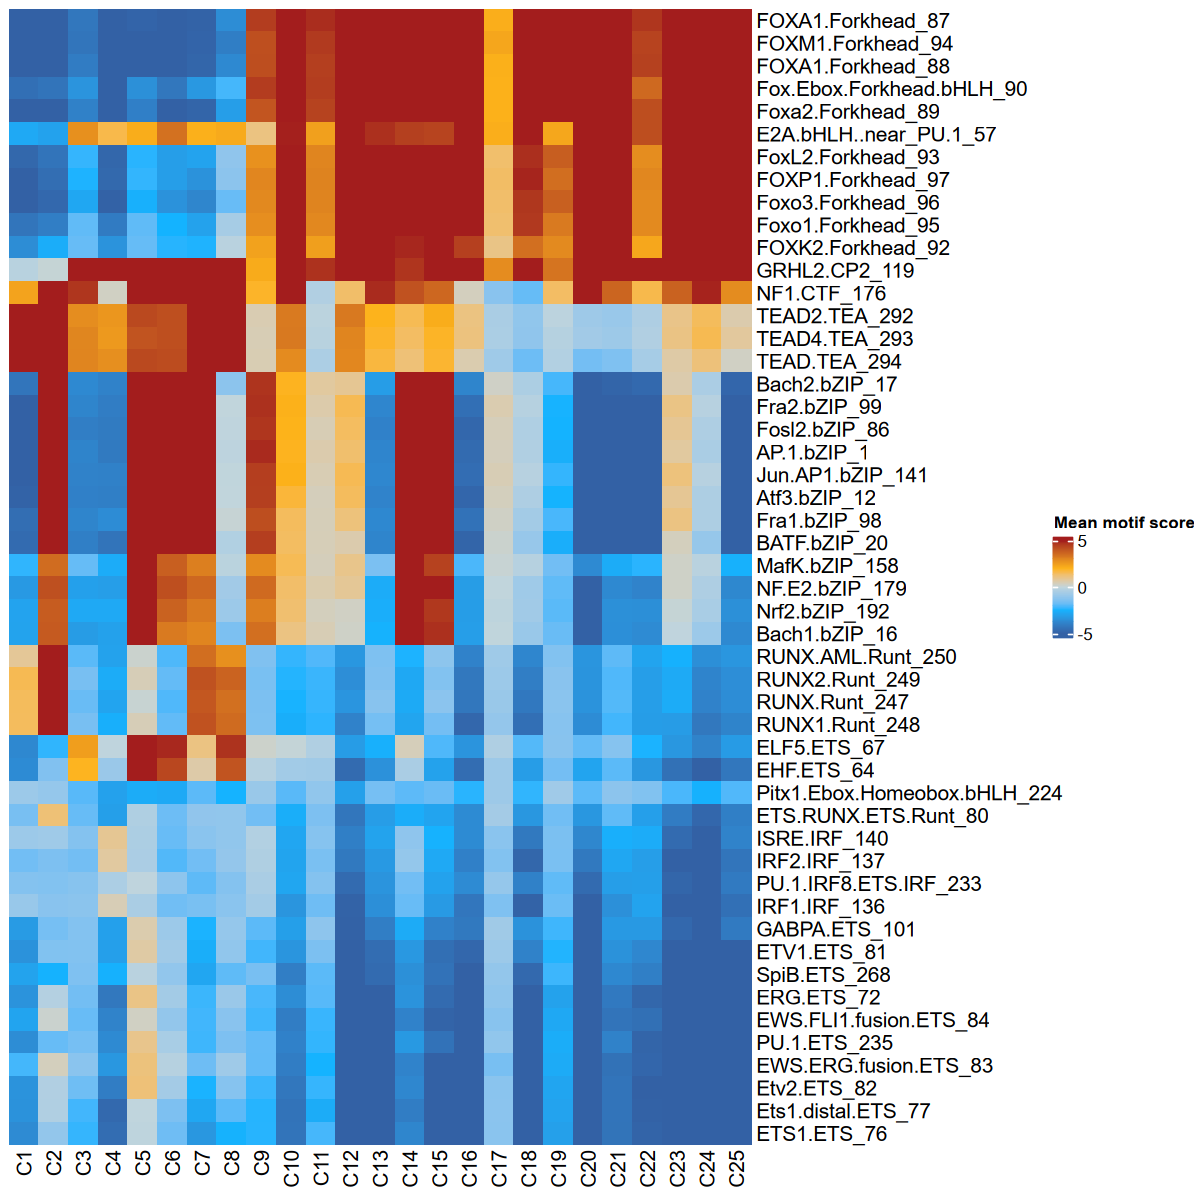

In [14]:
### motif enrichment
VarMotifs <- getVarDeviations(proj, name = "homerMatrix", plot = F)
MotifScoreClusters <- getMarkerFeatures(proj, 
                                        useMatrix = "homerMatrix", 
                                        groupBy = "clusters",
                                        bias = c("TSSEnrichment", "log10(nFrags)"),
                                        testMethod = "wilcoxon", 
                                        useSeqnames = "z")

fh <- function(x) hclust(dist(x), method="ward.D2")
idy <- which(mcols(MotifScoreClusters)$name %in% VarMotifs$name[c(1:50)])
mtx2 <- assays(MotifScoreClusters[idy,])$Mean %>% `rownames<-`(., mcols(MotifScoreClusters)$name[idy])

col_fun2 <- colorRamp2(c(-5,-2.5,0,2,5), paletteContinuous(set = "solarExtra", n = 5))
ht2 <- Heatmap(mtx2, name = "Mean motif score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun2)
options(repr.plot.width=10, repr.plot.height=10)
p6 <- draw(ht2)

In [ ]:
## 保存CNV+簇
metadata <- as.data.frame(proj@cellColData)
# 提取上皮细胞
cancer_cluster <- c("CNV_high")
cancer_cells <- rownames(metadata)[metadata$CNV %in% cancer_cluster]
proj_epithelial <- subsetArchRProject(
    ArchRProj = proj,
    cells = cancer_cells,
    outputDirectory = "./ArchRProject_cancer_All"
    )

Copying ArchRProject to new outputDirectory : /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_cancer_All

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 19): Annotations

Copying Other Files (2 of 19): Background-Peaks.rds

Copying Other Files (3 of 19): Embeddings

Copying Other Files (4 of 19): epithelial_cna.rds

Copying Other Files (5 of 19): epithelial_gr.rds

Copying Other Files (6 of 19): GeneScoreMatrix.Rds

Copying Other Files (7 of 19): GroupCoverages



In [ ]:
saveArchRProject(ArchRProj = proj, load = FALSE)